
# 🎨 数理学習のための Matplotlib テンプレート集
このノートブックは、機械学習や線形代数の学習（chapters/）において、**「数式の意味を正しく視覚化する」**ためのコード片をまとめたものです。

### 1. 幾何学的プロットの鉄則：正方形の格子


ノルム、回転行列、直交性などを扱う場合、グラフの見た目が歪んでいると数学的な直感（「円に見えるか」「直角に見えるか」）が働きません。
```python
ax.set_aspect('equal'):# 物理的な1単位の長さを縦横で揃えます。

ax.set_xticks() / ax.set_yticks(): #格子の線（目盛り）の間隔を揃えることで、1マスが完璧な正方形になります。
```

用途: L1/L2ノルムの比較、ベクトルの線形変換、直交ベクトルの確認。

### 2. ベクトル描画の簡略化
Matplotlib の plt.quiver は多機能すぎて、数理の学習中には引数の設定がストレスになりがちです。

- plot_vector(ax, v): 原点 (0,0) から成分 (v 
1
​
 ,v 
2
​
 ) へ伸びる矢印を一撃で描画するためのラッパー関数。

- ポイント: angles='xy', scale_units='xy', scale=1 を指定することで、座標系の数値と矢印の長さが一致するように設定しています。

### 3. 数理関数の可視化
損失関数の勾配（スロープ）や、データの分布を確認するための基本スタイルです。

LaTeX 記法: ラベルに $ $ を使うことで、グラフ内に w 
T
 x や σ(x) などの美麗な数式を表示します。

グリッドと透明度: grid(True, alpha=0.3) などで控えめに背景を入れると、データの傾向が読み取りやすくなります。

### 💡 運用Tips
本編（chapters/）のノートブックで複雑な図を書きたくなったら、まずここで試行錯誤し、「枯れたコード」だけを本編にコピペすることで、学習の認知負荷を下げることができます。



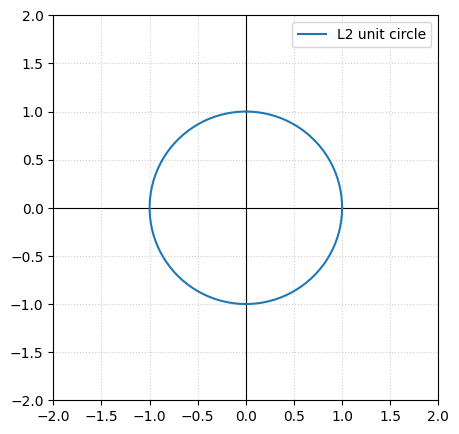

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def setup_square_grid(ax, lim=2):
    """格子を完璧な正方形に整える関数"""
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    
    # 0.5刻みで目盛りを打つ
    ticks = np.arange(-lim, lim + 0.5, 0.5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.axhline(0, color='black', lw=0.8) # x軸
    ax.axvline(0, color='black', lw=0.8) # y軸

# --- 使用例 ---
fig, ax = plt.subplots(figsize=(5, 5))
setup_square_grid(ax)

# L2ノルム（円）を描画
t = np.linspace(0, 2*np.pi, 100)
ax.plot(np.cos(t), np.sin(t), label="L2 unit circle")

ax.legend()
plt.show()

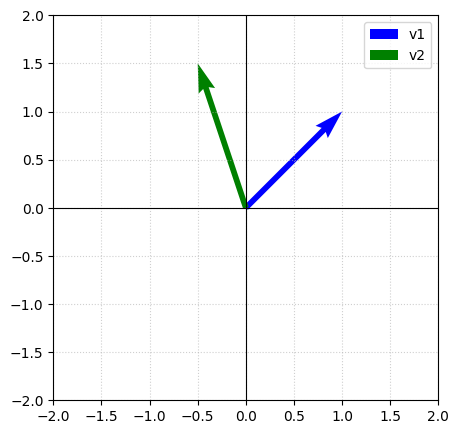

In [2]:
def plot_vector(ax, v, color='red', label=None):
    """原点から伸びるベクトル（矢印）を描画する"""
    ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, 
              color=color, width=0.015, label=label)

# --- 使用例 ---
fig, ax = plt.subplots(figsize=(5, 5))
setup_square_grid(ax)

v1 = np.array([1, 1])
v2 = np.array([-0.5, 1.5])

plot_vector(ax, v1, color='blue', label='v1')
plot_vector(ax, v2, color='green', label='v2')

ax.legend()
plt.show()

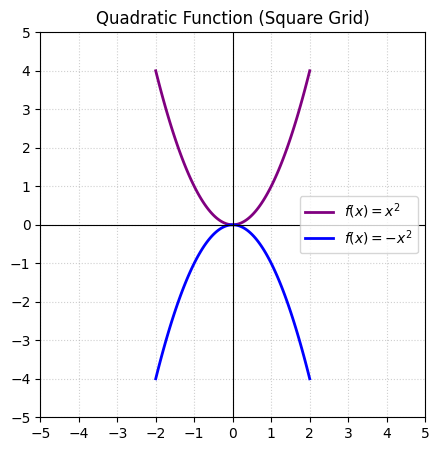

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. データの作成
x = np.linspace(-2, 2, 100)
y = x**2
y2= -x**2

fig, ax = plt.subplots(figsize=(5, 5)) # キャンバスを正方形に

# 2. グラフのプロット
ax.plot(x, y, label="$f(x) = x^2$", color='purple', lw=2)
ax.plot(x, y2, label="$f(x) = -x^2$", color='blue', lw=2)

# 3. 格子を正方形にする設定
# 縦横の範囲を揃える（例：-2.5 から 2.5）
lim = 4.5
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim) # y軸は0付近が見えるように調整

# アスペクト比を1:1に固定
ax.set_aspect('equal', adjustable='box')

# 目盛りを0.5刻みで統一
ticks = np.arange(-5,6,1.0)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

# 装飾
ax.grid(True, linestyle=':', alpha=0.6)
ax.axhline(0, color='black', lw=0.8)
ax.axvline(0, color='black', lw=0.8)
ax.legend()
ax.set_title("Quadratic Function (Square Grid)")

plt.show()